In [2]:
#-*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium

import os

In [3]:
try:
    os.chdir('D:/빅데이터 윈터스쿨 제주도자료')
    print("Current Working Directory is changed.")
except OSError:
    print("Can't change Current Working Directory.") 

Current Working Directory is changed.


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.style.use('ggplot')

In [6]:
data = pd.read_csv('train.csv', encoding='utf8')
data.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
id               415423 non-null int64
date             415423 non-null datetime64[ns]
bus_route_id     415423 non-null int64
in_out           415423 non-null object
station_code     415423 non-null int64
station_name     415423 non-null object
latitude         415423 non-null float64
longitude        415423 non-null float64
6~7_ride         415423 non-null float64
7~8_ride         415423 non-null float64
8~9_ride         415423 non-null float64
9~10_ride        415423 non-null float64
10~11_ride       415423 non-null float64
11~12_ride       415423 non-null float64
6~7_takeoff      415423 non-null float64
7~8_takeoff      415423 non-null float64
8~9_takeoff      415423 non-null float64
9~10_takeoff     415423 non-null float64
10~11_takeoff    415423 non-null float64
11~12_takeoff    415423 non-null float64
18~20_ride       415423 non-null float64
dtypes: datetime64[ns](1), fl

In [8]:
data['weekday'] = data['date'].dt.weekday

In [9]:
data['in_out'] = data['in_out'].map({'시내':0,'시외':1})

In [11]:
data.head()
data[data['bus_route_id'] == 31580000]['station_name'].drop_duplicates()

9978                     동산교
9979                    명신마을
9980                    한라병원
9981                   노형오거리
9982              월랑마을남녕고등학교
9983                    월산마을
9984                 월산정수장입구
9985                    정존마을
9986                  노형초등학교
9988                   해안동입구
9989                 운전면허시험장
9990                   유수암상동
9991                  제주아트리움
9992               평화로광령1리입구
9993                    고성2리
9994               제주시외버스터미널
9995                 하모3리 축협
9996            인성리(남문지앞사거리)
9997                  대정초교후문
9998                  보성초등학교
9999                   추사유배지
10000                    구억리
10001                 토요시장입구
10002                 NLCS제주
10003     동광환승정류장2(영어교육도시방면)
10004                블랭섬홀아시아
10005                 한국국제학교
10006                  삼정지에듀
10007                  보성리상동
10008                   대정농협
10009       모슬포남항여객선터미널(운진항)
10010                    오설록
10011              제주항공우주박물관
10012                   국제교회
10013         

In [12]:
data_airport = data[data['station_name'].str.contains("제주국제공항")].drop_duplicates('bus_route_id')
data_airport[data_airport['in_out'] == 1]

bus_route_id_airport = data_airport[data_airport['in_out'] == 1]['bus_route_id']
#data[data['station_name'].str.contains("제주국제공항")]
    
criteria = bus_route_id_airport.values.tolist()
    
bus_route_station_data_filter = data[data.bus_route_id.isin(criteria) & data['in_out'] == 1]
bus_route_station_data_filter

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday


In [13]:
bus_route_station_data_filter = data[ data['in_out'] == 1]

In [14]:
# 6~9 승차자수 합산

bus_route_station_data_filter['6_9_ride'] = bus_route_station_data_filter['6~7_ride'] + bus_route_station_data_filter['7~8_ride'] + bus_route_station_data_filter['8~9_ride']
#bus_route_station_data_filter.head(10)

In [15]:
# 날짜별(일자) 버스루트별 in_out별 정류소별
bus_route_station_data_filter_groupby = bus_route_station_data_filter.groupby(by=['bus_route_id','date','in_out','station_code'])['6_9_ride'].sum()
#bus_route_station_data_filter_groupby.head(100)

In [16]:
#평균구하기
#mean_line = np.mean(bus_route_station_sum_df['6_9_ride'])
mean_line = np.mean(bus_route_station_data_filter['6_9_ride'])


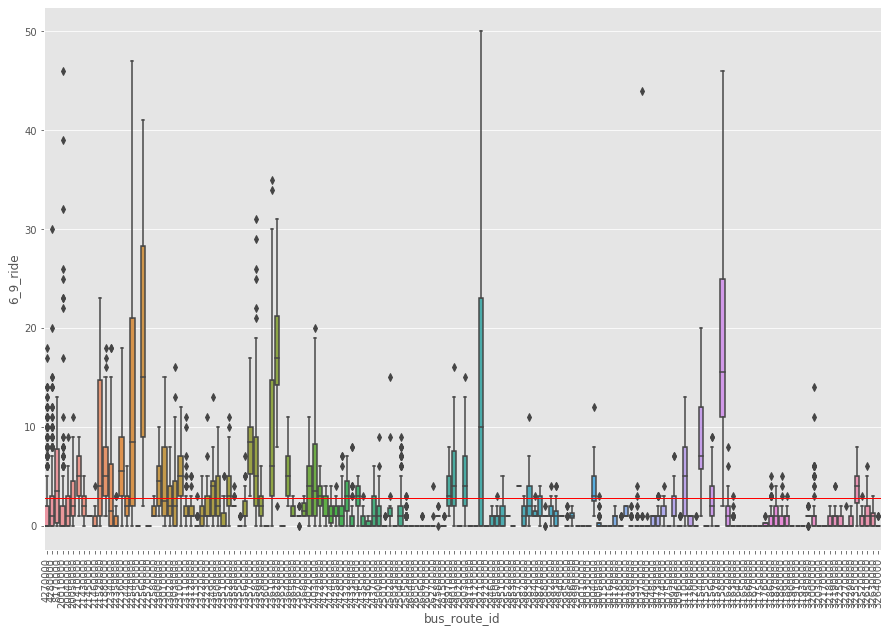

In [17]:
# 하루 단위
# box plot 그리기 위해서는 x축(노선), y축(승차인원), data 필요
plt.figure(figsize=(15, 10))

bus_route_station_sum_df = bus_route_station_data_filter.groupby(by=['bus_route_id','date','station_code','in_out'])['6_9_ride'].sum()

# series to dataframe
bus_route_station_sum_df = bus_route_station_sum_df.to_frame().reset_index()
#print(bus_route_station_sum_df)

# csv 파일로 저장
#bus_route_station_sum_df.to_csv("bus_route_station_sum_df.csv", mode='w')

# box plot
sns.boxplot("bus_route_id","6_9_ride", data = bus_route_station_sum_df)
#평균 선 그리기
plt.axhline(y=mean_line, color='r', linewidth=1)
plt.xticks(rotation = 90)
plt.rc('xtick',labelsize = 10)
plt.show()

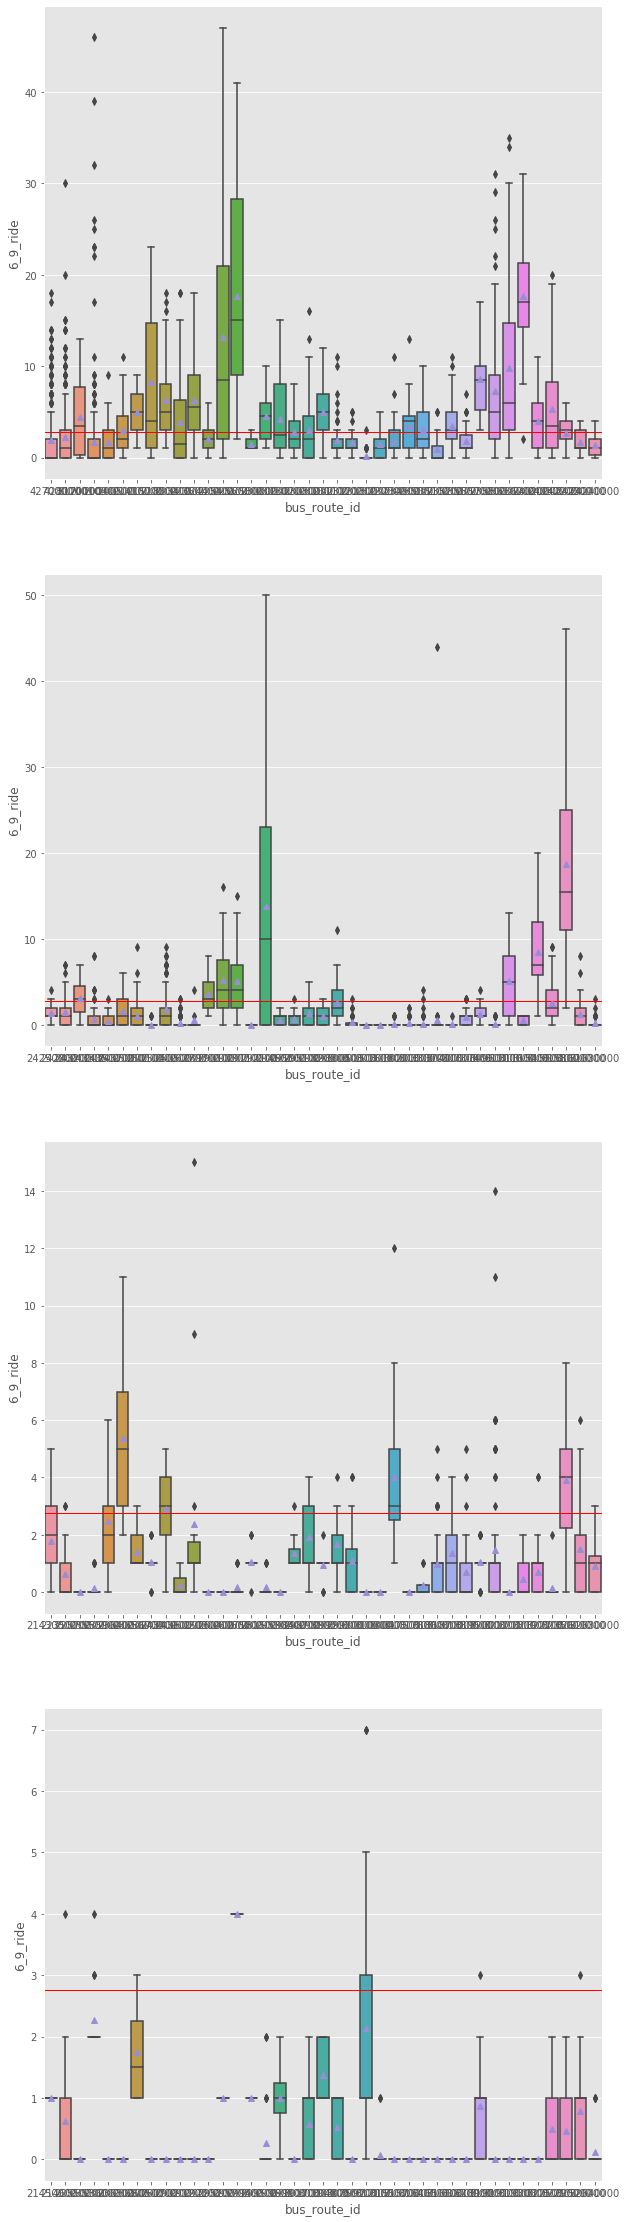

In [18]:
# 4 group visualization 

bus_id = bus_route_station_data_filter['bus_route_id'].drop_duplicates()
bus_id = bus_id.tolist()
group = []
group.append( bus_id[0:int(len(bus_id)/4)])
group.append( bus_id[int(len(bus_id)/4):int(len(bus_id)/4)*2])
group.append( bus_id[int(len(bus_id)/4*2):int(len(bus_id)/4)*3])
group.append( bus_id[int(len(bus_id)/4*3):int(len(bus_id)/4)*4])

bus_route_station_sum_df = bus_route_station_data_filter.groupby(by=['bus_route_id','date','station_code','in_out'])['6_9_ride'].sum()
bus_route_station_sum_df = bus_route_station_sum_df.to_frame().reset_index()

subplot_data1 = bus_route_station_sum_df[bus_route_station_sum_df['bus_route_id'].isin(group[0])]
subplot_data2 = bus_route_station_sum_df[bus_route_station_sum_df['bus_route_id'].isin(group[1])]
subplot_data3 = bus_route_station_sum_df[bus_route_station_sum_df['bus_route_id'].isin(group[2])]
subplot_data4 = bus_route_station_sum_df[bus_route_station_sum_df['bus_route_id'].isin(group[3])]

plt.figure(figsize = (10,40))
plt.subplot(411)
sns.boxplot("bus_route_id","6_9_ride", data = subplot_data1, showmeans=True)
plt.axhline(y=mean_line, color='r', linewidth=1)

plt.subplot(412)
sns.boxplot("bus_route_id","6_9_ride", data = subplot_data2, showmeans=True)
plt.axhline(y=mean_line, color='r', linewidth=1)

plt.subplot(413)
sns.boxplot("bus_route_id","6_9_ride", data = subplot_data3, showmeans=True)
plt.axhline(y=mean_line, color='r', linewidth=1)

plt.subplot(414)
sns.boxplot("bus_route_id","6_9_ride", data = subplot_data4, showmeans=True)
plt.axhline(y=mean_line, color='r', linewidth=1)
plt.show()



In [19]:
data1_sum = data1.groupby(by=['date','bus_route_id','station_code','in_out'])['6_9_ride'].sum()
data1_sum

NameError: name 'data1' is not defined

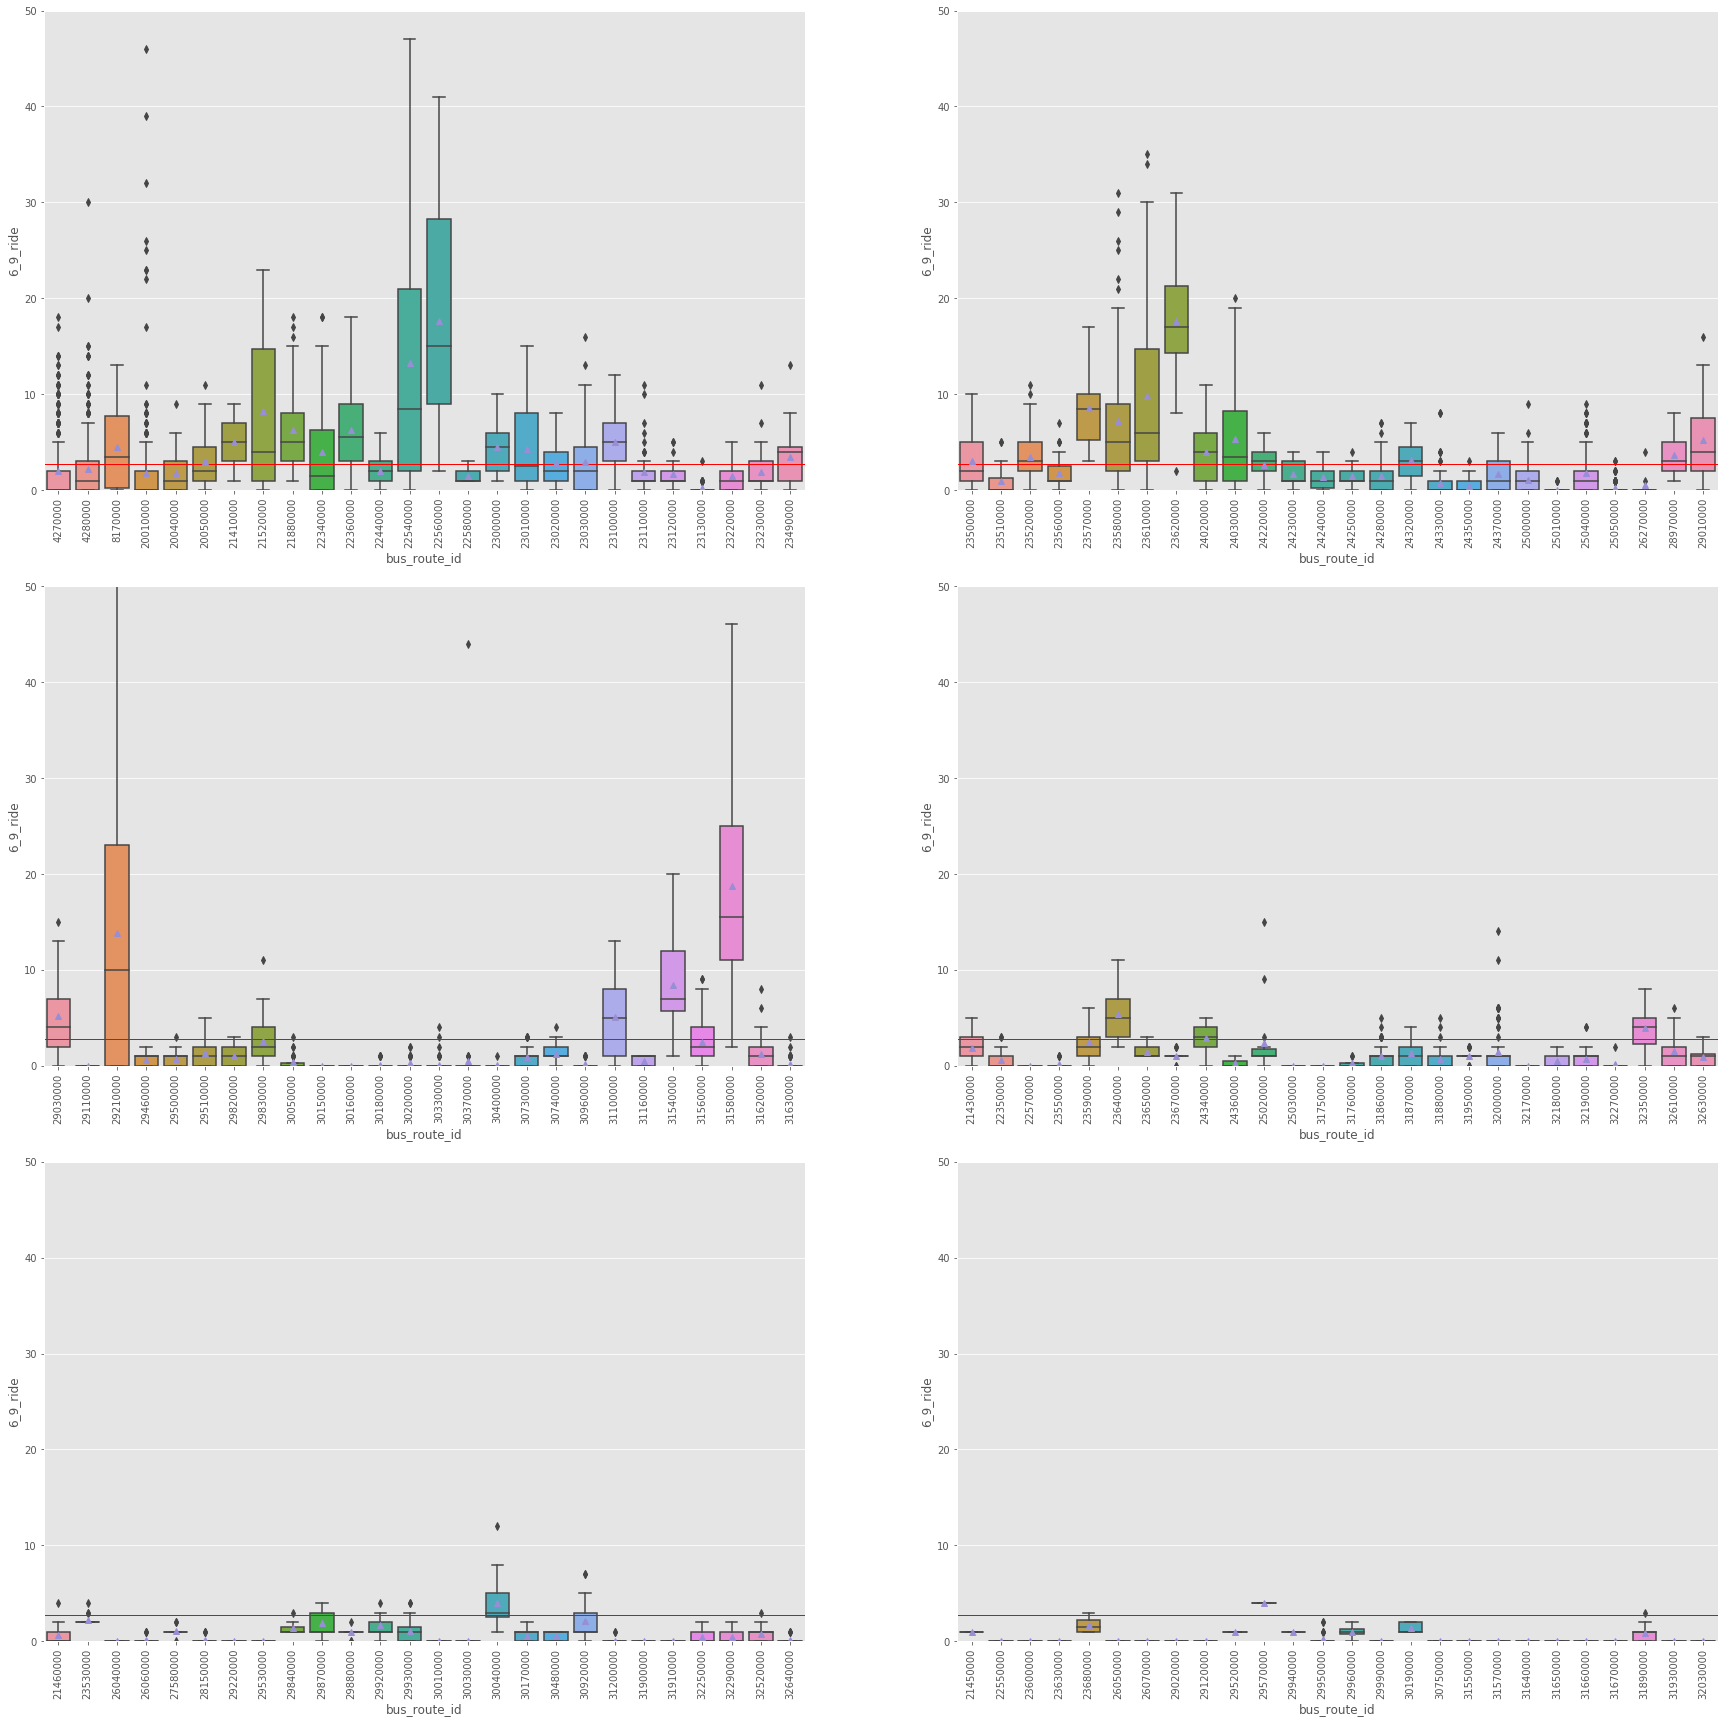

In [20]:
# 6 group visualization 

bus_id = bus_route_station_data_filter['bus_route_id'].drop_duplicates()
bus_id = bus_id.tolist()
group = []
group.append( bus_id[0:int(len(bus_id)/6)])
group.append( bus_id[int(len(bus_id)/6):int(len(bus_id)/6)*2])
group.append( bus_id[int(len(bus_id)/6*2):int(len(bus_id)/6)*3])
group.append( bus_id[int(len(bus_id)/6*3):int(len(bus_id)/6)*4])
group.append( bus_id[int(len(bus_id)/6*4):int(len(bus_id)/6)*5])
group.append( bus_id[int(len(bus_id)/6*5):int(len(bus_id)/6)*6])


bus_route_station_sum_df = bus_route_station_data_filter.groupby(by=['bus_route_id','date','station_code','in_out'])['6_9_ride'].sum()
bus_route_station_sum_df = bus_route_station_sum_df.to_frame().reset_index()

subplot_data1 = bus_route_station_sum_df[bus_route_station_sum_df['bus_route_id'].isin(group[0])]
subplot_data2 = bus_route_station_sum_df[bus_route_station_sum_df['bus_route_id'].isin(group[1])]
subplot_data3 = bus_route_station_sum_df[bus_route_station_sum_df['bus_route_id'].isin(group[2])]
subplot_data4 = bus_route_station_sum_df[bus_route_station_sum_df['bus_route_id'].isin(group[3])]
subplot_data5 = bus_route_station_sum_df[bus_route_station_sum_df['bus_route_id'].isin(group[4])]
subplot_data6 = bus_route_station_sum_df[bus_route_station_sum_df['bus_route_id'].isin(group[5])]

plt.figure(figsize = (30,30))
plt.subplot(321)
sns.boxplot("bus_route_id","6_9_ride", data = subplot_data1, showmeans=True)
plt.axhline(y=mean_line, color='r', linewidth=1)
plt.xticks(rotation = 90)
plt.rc('xtick', labelsize = 10 )
plt.ylim([0,50])

plt.subplot(322)
sns.boxplot("bus_route_id","6_9_ride", data = subplot_data2, showmeans=True)
plt.axhline(y=mean_line, color='r', linewidth=1)
plt.xticks(rotation = 90)
plt.rc('xtick', labelsize = 10 )
plt.ylim([0,50])

plt.subplot(323)
sns.boxplot("bus_route_id","6_9_ride", data = subplot_data3, showmeans=True)
plt.axhline(y=mean_line, color='r', linewidth=1)
plt.xticks(rotation = 90)
plt.rc('xtick', labelsize = 10 )
plt.ylim([0,50])

plt.subplot(324)
sns.boxplot("bus_route_id","6_9_ride", data = subplot_data4, showmeans=True)
plt.axhline(y=mean_line, color='r', linewidth=1)
plt.xticks(rotation = 90)
plt.rc('xtick', labelsize = 10 )
plt.ylim([0,50])

plt.subplot(325)
sns.boxplot("bus_route_id","6_9_ride", data = subplot_data5, showmeans=True)
plt.axhline(y=mean_line, color='r', linewidth=1)
plt.xticks(rotation = 90)
plt.rc('xtick', labelsize = 10 )
plt.ylim([0,50])

plt.subplot(326)
sns.boxplot("bus_route_id","6_9_ride", data = subplot_data6, showmeans=True)
plt.axhline(y=mean_line, color='r', linewidth=1)
plt.xticks(rotation = 90)
plt.rc('xtick', labelsize = 10 )
plt.ylim([0,50])

plt.show()

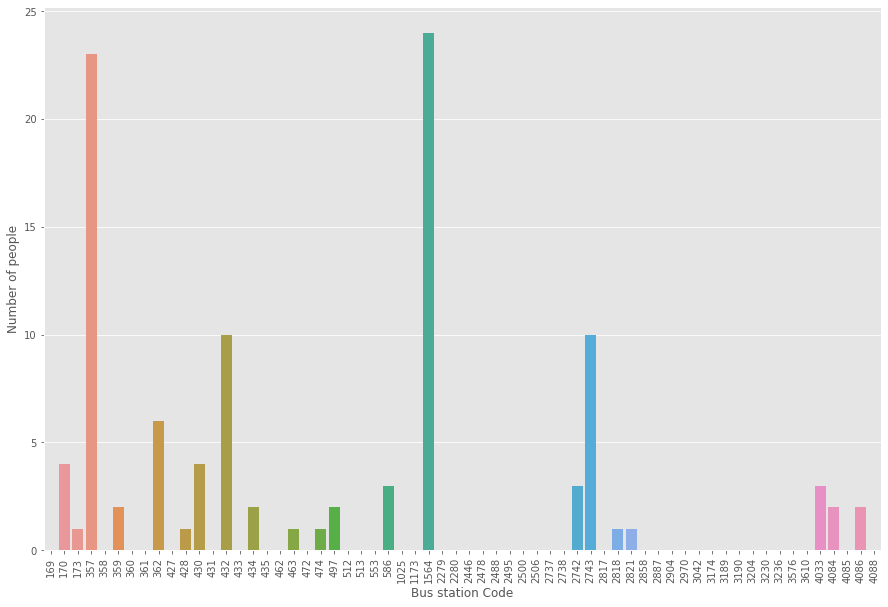

In [21]:
data[data['bus_route_id'] == 31580000].drop_duplicates('station_code')
data1 = data[data['bus_route_id'] == 31580000].drop_duplicates('station_code')
data1['6_9_ride'] = data1['6~7_ride'] + data1['7~8_ride'] + data1['8~9_ride']
data1_sum = data1.groupby(by=['date','bus_route_id','station_code','in_out'])['6_9_ride'].sum()
data1_sum = data1_sum.to_frame().reset_index()

y = data1_sum['6_9_ride']
x = data1_sum['station_code']

plt.figure(figsize = (15,10))
sns.barplot(x = 'station_code' , y = '6_9_ride' , data = data1_sum)
plt.xlabel('Bus station Code')
plt.ylabel('Number of people')
plt.xticks(rotation = 90)
plt.rc('xtick', labelsize = 8)

In [22]:
# data visualization_map
import folium

map_data = data[['bus_route_id','station_name','latitude','longitude','station_code']]
map_bus_route = map_data[map_data['bus_route_id'] == 31580000].drop_duplicates("station_code")
bus_station_busy = [1564, 357, 432, 2743]


map_osm = folium.Map(location=[33.4134, 126.5190], zoom_start = 10.5)


for item in map_bus_route.index:
    lat = map_bus_route.loc[item,'latitude']
    long = map_bus_route.loc[item,'longitude']
    
    
    if map_bus_route.loc[item,'station_code'] in bus_station_busy :
            folium.Marker([lat,long],popup = map_bus_route.loc[item,'station_name'],
                      icon = folium.Icon(color = 'red', icon = 'info-sign')
                      ).add_to(map_osm)
    else:
        folium.Marker([lat,long],popup = map_bus_route.loc[item,'station_name'],
                      icon = folium.Icon(icon = '')
                      ).add_to(map_osm)

    
#folium.PolyLine(map_bus_route[['latitude','longitude']]).add_to(map_osm)
map_osm

In [23]:
map_osm = folium.Map(location=[33.4134, 126.5190], zoom_start = 10.5)
map_bus_route = map_data[map_data['bus_route_id'] == 31580000].drop_duplicates("station_code")



    
for item in map_bus_route.index:
    lat = map_bus_route.loc[item,'latitude']
    long = map_bus_route.loc[item,'longitude']
    
    
    if map_bus_route.loc[item,'station_code'] in bus_station_busy :
            folium.Marker([lat,long],popup = map_bus_route.loc[item,'station_name'],
                      icon = folium.Icon(color = 'red', icon = 'info-sign')
                      ).add_to(map_osm)
  
        
        
map_osm

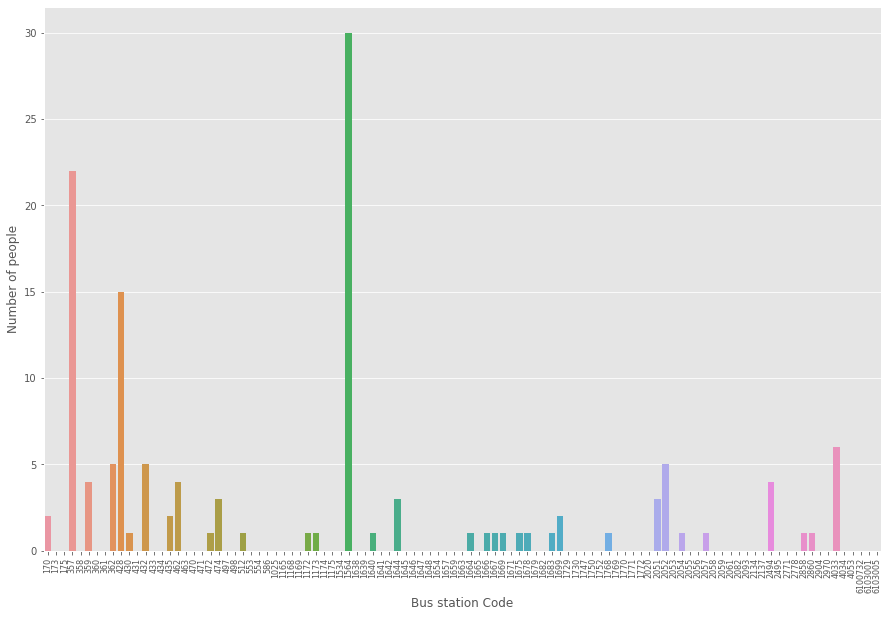

In [24]:
data[data['bus_route_id'] == 22540000].drop_duplicates('station_code')
data1 = data[data['bus_route_id'] == 22540000].drop_duplicates('station_code')
data1['6_9_ride'] = data1['6~7_ride'] + data1['7~8_ride'] + data1['8~9_ride']
data1_sum = data1.groupby(by=['date','bus_route_id','station_code','in_out'])['6_9_ride'].sum()
data1_sum = data1_sum.to_frame().reset_index()

y = data1_sum['6_9_ride']
x = data1_sum['station_code']

plt.figure(figsize = (15,10))
sns.barplot(x = 'station_code' , y = '6_9_ride' , data = data1_sum)
plt.xlabel('Bus station Code')
plt.ylabel('Number of people')
plt.xticks(rotation = 90)
plt.rc('xtick', labelsize = 8)

In [25]:
# data visualization_map
import folium

map_data = data[['bus_route_id','station_name','latitude','longitude','station_code']]
map_bus_route = map_data[map_data['bus_route_id'] == 22540000].drop_duplicates("station_code")
bus_station_busy = [1564, 357, 428]


map_osm = folium.Map(location=[33.4134, 126.5190], zoom_start = 10.5)


for item in map_bus_route.index:
    lat = map_bus_route.loc[item,'latitude']
    long = map_bus_route.loc[item,'longitude']
    
    
    if map_bus_route.loc[item,'station_code'] in bus_station_busy :
            folium.Marker([lat,long],popup = map_bus_route.loc[item,'station_name'],
                      icon = folium.Icon(color = 'red', icon = 'info-sign')
                      ).add_to(map_osm)
    else:
        folium.Marker([lat,long],popup = map_bus_route.loc[item,'station_name'],
                      icon = folium.Icon(icon = '')
                      ).add_to(map_osm)

    
#folium.PolyLine(map_bus_route[['latitude','longitude']]).add_to(map_osm)
map_osm

In [26]:
map_osm = folium.Map(location=[33.4134, 126.5190], zoom_start = 10.5)
map_bus_route = map_data[map_data['bus_route_id'] == 22540000].drop_duplicates("station_code")

    
for item in map_bus_route.index:
    lat = map_bus_route.loc[item,'latitude']
    long = map_bus_route.loc[item,'longitude']
    
    
    if map_bus_route.loc[item,'station_code'] in bus_station_busy :
            folium.Marker([lat,long],popup = map_bus_route.loc[item,'station_name'],
                      icon = folium.Icon(color = 'red', icon = 'info-sign')
                      ).add_to(map_osm)
  
        
        
map_osm

In [73]:
m_count = data[['date','bus_route_id','6~7_ride','7~8_ride','8~9_ride','in_out','station_code']] # 날짜,노선,탑승자수
m_count.head()

,date,bus_route_id,6~7_ride,7~8_ride,8~9_ride,in_out,station_code
0,2019-09-01,4270000,0.0,1.0,2.0,1,344
1,2019-09-01,4270000,1.0,4.0,4.0,1,357
2,2019-09-01,4270000,1.0,1.0,0.0,1,432
3,2019-09-01,4270000,0.0,17.0,6.0,0,1579
4,2019-09-01,4270000,0.0,0.0,0.0,0,1646


In [74]:
m_count_filter = m_count[data['in_out'] == 0]
m_count_filter.head()

,date,bus_route_id,6~7_ride,7~8_ride,8~9_ride,in_out,station_code
3,2019-09-01,4270000,0.0,17.0,6.0,0,1579
4,2019-09-01,4270000,0.0,0.0,0.0,0,1646
5,2019-09-01,4270000,0.0,0.0,0.0,0,1648
9,2019-09-01,4270000,0.0,0.0,0.0,0,2008
11,2019-09-01,4270000,0.0,0.0,0.0,0,2013


In [75]:
m_count_filter['6~9_ride'] = m_count['6~7_ride'] + m_count['7~8_ride'] + m_count['8~9_ride']
m_count_filter.head()

,date,bus_route_id,6~7_ride,7~8_ride,8~9_ride,in_out,station_code,6~9_ride
3,2019-09-01,4270000,0.0,17.0,6.0,0,1579,23.0
4,2019-09-01,4270000,0.0,0.0,0.0,0,1646,0.0
5,2019-09-01,4270000,0.0,0.0,0.0,0,1648,0.0
9,2019-09-01,4270000,0.0,0.0,0.0,0,2008,0.0
11,2019-09-01,4270000,0.0,0.0,0.0,0,2013,0.0


In [84]:
m_count_filter_groupby = m_count_filter.groupby(by=['bus_route_id','station_code','date'])['6~9_ride'].sum()
m_count_filter_groupby.head()

bus_route_id  station_code  date      
4270000       1579          2019-09-01    23.0
                            2019-09-02    30.0
                            2019-09-03    25.0
                            2019-09-04    29.0
                            2019-09-05    27.0
Name: 6~9_ride, dtype: float64

In [85]:
maxvalue = m_count_filter.groupby(by=['bus_route_id','station_code','date'])['6~9_ride'].sum()
print(maxvalue)
maxvalue = maxvalue.to_frame().reset_index()

bus_route_id  station_code  date      
4270000       1579          2019-09-01    23.0
                            2019-09-02    30.0
                            2019-09-03    25.0
                            2019-09-04    29.0
                            2019-09-05    27.0
                            2019-09-06    25.0
                            2019-09-07     2.0
                            2019-09-08    34.0
                            2019-09-09    32.0
                            2019-09-10    24.0
                            2019-09-11    32.0
                            2019-09-12    39.0
                            2019-09-13    33.0
                            2019-09-14    23.0
                            2019-09-15    38.0
                            2019-09-16    52.0
                            2019-09-17    42.0
                            2019-09-18    25.0
                            2019-09-19    40.0
                            2019-09-20    29.0
                     

In [86]:
sorted(maxvalue, reverse=True)

['station_code', 'date', 'bus_route_id', '6~9_ride']

In [87]:
maxvalue.sort_values(by=['6~9_ride'], axis=0, ascending=False)

,bus_route_id,station_code,date,6~9_ride
39133,22520000,3270,2019-09-25,172.0
115225,23580000,447,2019-09-19,171.0
44554,22550000,6100732,2019-09-09,166.0
39138,22520000,3270,2019-09-30,158.0
38176,22520000,1565,2019-09-19,155.0
114055,23570000,447,2019-09-04,153.0
38167,22520000,1565,2019-09-10,151.0
41843,22540000,1564,2019-09-06,151.0
39125,22520000,3270,2019-09-17,150.0
115223,23580000,447,2019-09-17,149.0


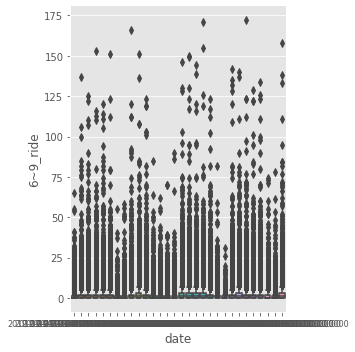

In [92]:
sns.catplot(x="date",y="6~9_ride",kind='box',data=maxvalue)